Given the dataset of advertising, predict the sales for TV ads.


In [8]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics
#matrics for evaluation

In [9]:
# Read data from dataset
data = pd.read_csv("Advertising.csv")
print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


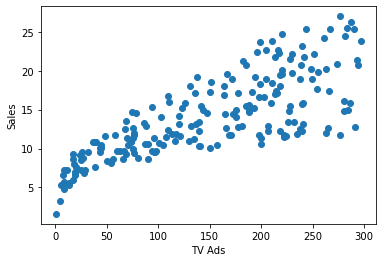

In [10]:
# Sales is the dependebt variable, TV is independent variable.
plt.scatter(data["TV"],data["sales"])
plt.xlabel("TV Ads")
plt.ylabel("Sales")
plt.show()

In [11]:
# Check for the null values
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
# Segregate dependent and independent variables

x = data["TV"].values.reshape(-1,1)                            #Independent variable
y = data["sales"].values.reshape(-1,1)                         #Dependent variable


In [14]:
print(x)


[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

In [19]:
# Converting the dataset into a vertical format

print(x.reshape(-1,1))

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [21]:
print(y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


In [22]:
print(type(x))

<class 'numpy.ndarray'>


In [23]:
# Train the algorithm

lin_reg = LinearRegression()
lin_reg.fit(x,y)  # training the model

LinearRegression()

In [24]:
# Predictions

y_pred = lin_reg.predict(x)
print(y_pred)

[[17.97077451]
 [ 9.14797405]
 [ 7.85022376]
 [14.23439457]
 [15.62721814]
 [ 7.44616232]
 [ 9.76595037]
 [12.74649773]
 [ 7.44140866]
 [16.53041431]
 [10.17476548]
 [17.23871025]
 [ 8.16396559]
 [11.66741599]
 [16.73482186]
 [16.32125309]
 [10.25557777]
 [20.40940417]
 [10.32212907]
 [14.03474068]
 [17.41459582]
 [18.31779199]
 [ 7.6600772 ]
 [17.88520856]
 [ 9.99412625]
 [19.52997632]
 [13.82557947]
 [18.44614092]
 [18.85970969]
 [10.38868036]
 [20.95607553]
 [12.39948025]
 [11.653155  ]
 [19.65832525]
 [11.58185004]
 [20.85149492]
 [19.72012288]
 [10.58358059]
 [ 9.08142275]
 [17.87094757]
 [16.65876324]
 [15.44657891]
 [20.98935118]
 [16.86792445]
 [ 8.22576322]
 [15.35625929]
 [11.2966302 ]
 [18.43663359]
 [17.83291826]
 [10.21279479]
 [16.53041431]
 [11.80527225]
 [17.31952254]
 [15.71278409]
 [19.52046899]
 [16.48763133]
 [ 7.37961102]
 [13.50708398]
 [17.05331735]
 [17.04856369]
 [ 9.57580381]
 [19.45391769]
 [18.4081116 ]
 [11.91460652]
 [13.26464711]
 [10.31262174]
 [ 8.52999

In [32]:
from sklearn import metrics
import math
# Calculating error

print("MSE:", metrics.mean_squared_error(y_pred,y)) # y=sctual value
print("RMSE:", math.sqrt(metrics.mean_squared_error(y_pred,y))) 
print("MAE:", metrics.mean_absolute_error(y_pred,y))
# Accuracy = 1-error or 100-error --> 100-10 = 89.4
print("Accuracy is:", 100-metrics.mean_squared_error(y_pred,y))

MSE: 10.512652915656757
RMSE: 3.2423221486546887
MAE: 2.549806038927486
Accuracy is: 89.48734708434324


In [33]:
#R-square value
print("R-square:", lin_reg.score(x,y))

R-square: 0.611875050850071


In [34]:
# Predictions on user input values or unknown data
TV_ads=int(input("Enter TV ad expenses:"))
print("Estimated sales:", lin_reg.predict([[TV_ads]]))


Enter TV ad expenses:500
Estimated sales: [[30.80091377]]


In [35]:
#Coeficients of linear regression
print(lin_reg.coef_)        #b1
print(lin_reg.intercept_)   #b0

[[0.04753664]]
[7.03259355]


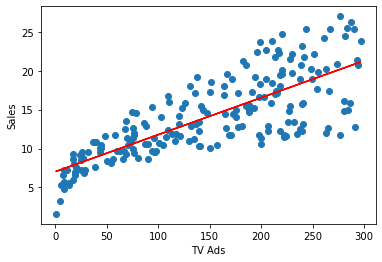

In [36]:
# Showing regression(bestfitting line) line

plt.scatter(data["TV"],data["sales"])
plt.plot(data["TV"], y_pred,color='red')
plt.xlabel("TV Ads")
plt.ylabel("Sales")
plt.show()

In [37]:
print(data.var())

Unnamed: 0    3350.000000
TV            7370.949893
radio          220.427743
newspaper      474.308326
sales           27.221853
dtype: float64


In [38]:
print(data.describe())

       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000
